<a href="https://colab.research.google.com/github/Norod/my-colab-experiments/blob/master/fun_with_stylegan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/
!pip install typeguard
!git clone https://github.com/NVlabs/stylegan.git
%cd stylegan
!git clone https://github.com/kylemcdonald/python-utils.git utils

/content
Cloning into 'stylegan'...
remote: Enumerating objects: 77, done.
remote: Total 77 (delta 0), reused 0 (delta 0), pack-reused 77
Unpacking objects: 100% (77/77), done.
/content/stylegan
Cloning into 'utils'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 177 (delta 45), reused 51 (delta 23), pack-reused 94
Receiving objects: 100% (177/177), 43.31 KiB | 14.44 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [2]:
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

from utils.imutil import imshow, imresize
from utils.mosaic import make_mosaic

tflib.init_tf()

# Load pre-trained network.
url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl
with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
    _G, _D, Gs = pickle.load(f)
    # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
    # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
    # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
from PIL import Image

# Pick latent vector.
#random_seed = 1000
random_seed = None
rnd = np.random.RandomState(random_seed)
latents = rnd.randn(1, Gs.input_shape[1])

!mkdir './out'

##################

number_of_images = 24

# Generate image.
all = []
counter = 0
reverse_counter = (number_of_images * 2) - 1
for i in np.linspace(-1,3,number_of_images):
  print(i)
  fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
  images = Gs.run(latents, None, truncation_psi=i, randomize_noise=True, output_transform=fmt)
  all.append(images[0])
  im = Image.fromarray(images[0])
  im.save('./out/StyleGanImg_' + str(counter) + '.jpg')
  if (reverse_counter > counter):
    im.save('./out/StyleGanImg_' + str(reverse_counter) + '.jpg')
  counter = counter + 1
  reverse_counter = reverse_counter - 1
  

-1.0
-0.8260869565217391
-0.6521739130434783
-0.4782608695652174
-0.30434782608695654
-0.13043478260869568
0.04347826086956519
0.21739130434782616
0.3913043478260869
0.5652173913043477
0.7391304347826086
0.9130434782608696
1.0869565217391304
1.2608695652173911
1.4347826086956523
1.608695652173913
1.7826086956521738
1.9565217391304346
2.1304347826086953
2.3043478260869565
2.4782608695652173
2.652173913043478
2.8260869565217392
3.0


In [4]:
!ffmpeg -f image2  -framerate 8 -i "./out/StyleGanImg_%01d.jpg" -b:v 8192k -r 30 -y -c:v libx264 StyleGanImg_all.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [5]:
!ls -latr /content/stylegan/StyleGanImg_all.mp4

from IPython.display import HTML
from base64 import b64encode
mp4 = open('StyleGanImg_all.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=512 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

-rw-r--r-- 1 root root 6945366 Nov 13 12:36 /content/stylegan/StyleGanImg_all.mp4


In [0]:
#import shutil
#shutil.make_archive('StyleGanImg_all', 'zip', './out/')

#!rm -rf './out'

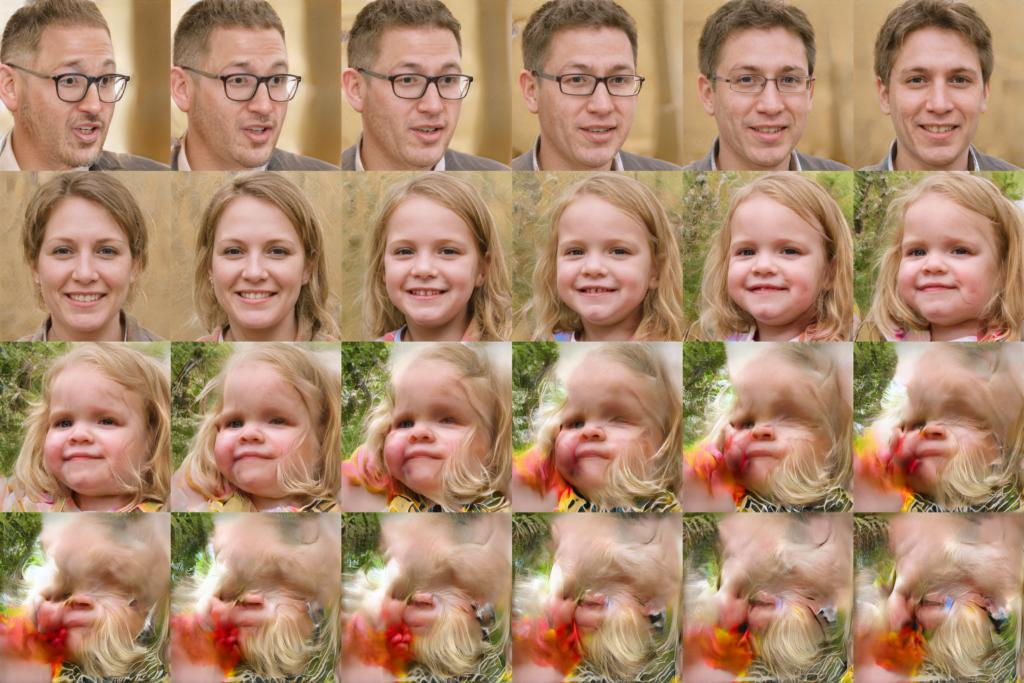

In [7]:
mosaic = make_mosaic(np.asarray(all))
mosaic = imresize(mosaic, max_side=1024) # comment this out for higher res
imshow(mosaic, retina=True, fmt='jpg')